순환신경망(RNN: Recurrent Neural Network)
음성인식 또는 문장번역시 사용가능 / 시계열데이터 예측 가능
주요개념 : Embedding, SimpleRNN, LSTM, Conv1D

In [1]:
# Embedding층 : 단어(또는 데이터)를 벡터형태로 표현할 수 있음 -> 텍스트 분류의 가장 기본적인 층
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

texts = ['You are the Best', 'You are the Nice']
tokenizer = Tokenizer(num_words = 10, oov_token = '<OOV>')
tokenizer.fit_on_texts(texts)

# 텍스트 데이터를 정수 인덱스 형태로 변환
sequences = tokenizer.texts_to_sequences(texts)

# 이진형태로 인코딩
binary_results = tokenizer.sequences_to_matrix(sequences, mode = 'binary')

print(tokenizer.word_index)
print('------------------------------------------------------------------')

print(f'sequences: {sequences}\n')
print((f'binary_vectors:\n {binary_results}\n'))

test_text = ['You are the One']
test_sq = tokenizer.texts_to_sequences(test_text)

print(f'test sequences: {test_sq}')

{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
------------------------------------------------------------------
sequences: [[2, 3, 4, 5], [2, 3, 4, 6]]

binary_vectors:
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]

test sequences: [[2, 3, 4, 1]]


In [2]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [3]:
# 데이터 형태확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [4]:
# imdb데이터는 이미 인코딩이 완료되어 있음.
# 데이터를 동일한 길이로 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 500
print('Before pad_sequences: ', len(X_train[0]))

pad_X_train = pad_sequences(X_train, maxlen = max_len, padding = 'pre')
pad_X_test = pad_sequences(X_test, maxlen = max_len, padding = 'pre')

print('After pad_sequences: ', len(pad_X_train[0]))

Before pad_sequences:  218
After pad_sequences:  500


In [5]:
# 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
# 해당층은 모델의 첫번째 층으로만 사용가능
# Flatten층을 사용하기 위해 input_length를 전달
# input_dim의 인자는 학습 데이터 셋에 사용한 단어의 개수
# output_dim의 인자는 임베딩 벡터의 크기 - 임베딩 벡터란 -> 하나의 토큰을 해당 개수의 차원의 텐서로 변환한 것
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(pad_X_train, y_train, batch_size = 32, epochs = 5, validation_split = 0.2)

Epoch 1/5
625/625 [==============================] - 3s 5ms/step - loss: 0.4689 - acc: 0.7716 - val_loss: 0.3004 - val_acc: 0.8750
Epoch 2/5
625/625 [==============================] - 4s 7ms/step - loss: 0.2012 - acc: 0.9253 - val_loss: 0.2746 - val_acc: 0.8922
Epoch 3/5
625/625 [==============================] - 4s 7ms/step - loss: 0.1058 - acc: 0.9701 - val_loss: 0.2888 - val_acc: 0.8848
Epoch 4/5
625/625 [==============================] - 4s 7ms/step - loss: 0.0508 - acc: 0.9904 - val_loss: 0.3180 - val_acc: 0.8826
Epoch 5/5
625/625 [==============================] - 4s 7ms/step - loss: 0.0234 - acc: 0.9978 - val_loss: 0.3408 - val_acc: 0.8812


In [7]:
model.evaluate(pad_X_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3449 - acc: 0.8758


[0.3448750674724579, 0.8758400082588196]

Embedding층은 단순하게 데이터의 표현을 학습해 데이터 사전을 구축하는 것
즉, 유사한 의미의 단어를 비슷한 공간에 매핑은 가능하지만 순서와 맥락은 고려하지 않음
RNN(Recurrent Neural Network - 순환신경망)은 이 문제를 해결하기 위해 고안된 층
순환 신경망은 각 층의 결괏값이 출력층을 향하면서도 동시에 현재 층의 다음계산에 사용됨

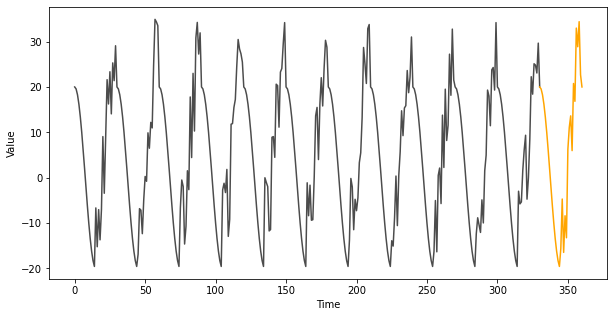

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30*12+1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5, np.cos(2*np.pi*month_time),
                            np.cos(2*np.pi*month_time) + np.random.random(361))
plt.figure(figsize = (10, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30*11+1), time_series[:30*11+1], color = 'black', alpha = 0.7)

plt.plot(np.arange(30*11, 30*12+1), time_series[30*11:], color = 'orange')

In [14]:
def make_sequence(time_series, n):
    x_train, y_train = list(), list()

    for i in range(len(time_series)):
        x = time_series[i:(i+n)]
        if (i+n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i+n])
        else:
            break
    return np.array(x_train), np.array(y_train)

n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

partial_x_train = x_train[:30*11]
partial_y_train = y_train[:30*11]
x_test = x_train[30*11:]
y_test = y_train[30*11:]

print('train:', partial_x_train.shape, partial_y_train.shape)
print('test:', x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [15]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)

for i in range(1, 4):
    print(a[i], '|', b[i])

[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


In [18]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential
# Flatten층은 다차원 배열을 1차원으로 변경해주는 층

model = Sequential()
# SimpleRNN층을 첫번째 층으로 사용하는 경우, 반드시 input.shape를 명시해주어야 함
model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n,1)))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()
model.fit(x_train, y_train, epochs = 100, batch_size = 12)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 0s 2ms/step - loss: 235.1219
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 201.2361
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 170.9228
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 150.1680
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 134.7253
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 122.7748
Epoch 7/100
30/30 [===

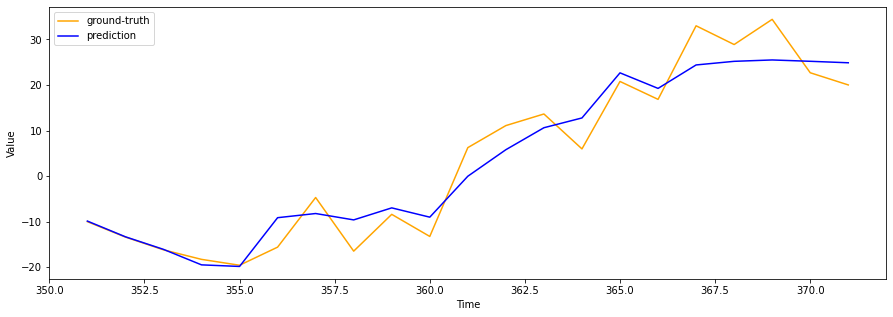

In [21]:
pred = model.predict(x_test)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize = (15, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color = 'orange', label = 'ground-truth')
plt.plot(pred_range, pred.reshape(-1,), color = 'blue', label = 'prediction')
plt.legend()
plt.show()

In [24]:
# IMDB데이터셋 활용
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 500
pad_X_train = pad_sequences(X_train, maxlen = max_len)
pad_X_test = pad_sequences(X_test, maxlen = max_len)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))
model.add(SimpleRNN(32, return_sequences = True, dropout = 0.15, recurrent_dropout = 0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()
history = model.fit(pad_X_train, y_train, batch_size = 32, epochs = 15, validation_split = 0.2)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 324,193
Trainable params: 324,193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
625/625 [==============================] - 102s 164ms/step - loss: 0.7004 - acc: 0.5056 - val_loss: 0.6936 - val_acc: 0.5090
Epoch 2/15
625/625 [==============================] - 104s 166ms/step - loss: 0.6936 - acc: 0.5219 - val_loss:

In [25]:
# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()
history = model.fit(pad_X_train, y_train, batch_size = 32, epochs = 15, validation_split = 0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          24832     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 357,281
Trainable params: 357,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
625/625 [==============================] - 176s 281ms/step - loss: 0.4805 - acc: 0.7619 - val_loss: 0.3669 - val_acc: 0.8418
Epoch 2/15
625/625 [==============================] - 179s 287ms/step - loss: 0.2914 - acc: 0.8861 - val_loss: